<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/Simple%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload file to google colab

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))

Saving IATdemo.csv to IATdemo (1).csv
User uploaded file "IATdemo.csv"


view the uploaded data

In [ ]:
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['IATdemo.csv'].decode('utf-8')))
data.head()

,TimeStamps
0,1156748010.47817 60
1,1156748010.47867 1254
2,1156748010.47879 1514
3,1156748010.47892 1494
4,1156748010.47892 114


upload fashion dataset from keras library

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

visualize the data in a graph

benin 150
malignant 47


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


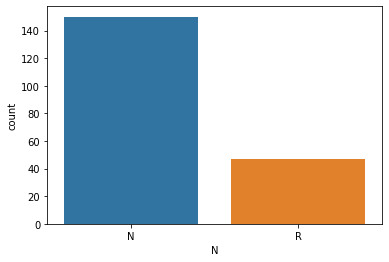

In [ ]:
import seaborn as sns
ax = sns.countplot(data['N'], label = 'Count')
b, m = data['N'].value_counts()
print('benin', b)
print('malignant', m)

In [ ]:
del data['5.1']

data preprocesssing

In [ ]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# encoding catagorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(177, 32)

In [ ]:
X_test.shape

(20, 32)

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# adding the input and first hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1, 1)),
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(10)])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(Xtrain, Ytrain, epochs=100, validation_split = .1, verbose=1, batch_size=4)

In [ ]:
prob = model.evaluate(Xtest)